# Haber Tweetlerinin Duygu Analizi Ve Sınıflandırma

In [1]:
import string  
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import preprocessing 
import re

In [2]:
# veri seti okumasi
data=pd.read_csv("dataset.csv")

In [3]:
# kac tane veri var
data.count()

Unnamed: 0       2716
hour             2716
tweet            2716
Tweets_duygu     2716
sınıflandırma    2716
dtype: int64

In [4]:
# ilk 10 veri gorunmesi
data.head(10)

,Unnamed: 0,hour,tweet,Tweets_duygu,sınıflandırma
0,0,9,Ali Koçtan Şike Kumpası Davasında verilen ceza...,negatif,spor
1,1,8,Abdulkadir Selvi Venezuelaya giden CHPli mille...,negatif,siyaset
2,2,8,Futbolda şike soruşturmasını ilk başlatan poli...,negatif,spor
3,3,8,SONDAKİKA Futbolda şike kumpası davası Hidayet...,negatif,spor
4,4,6,AKPde bir istifa kararı daha,negatif,siyaset
5,5,6,CHPli Tanrıkulu Yargıtay Mehmet Ağar hakkında...,negatif,siyaset
6,6,6,Bahçeli Erdoğanın yıllık dostunu FETÖcü ilan ...,negatif,siyaset
7,7,6,Ünlü sunucu Ezgi Avcının tatil pozları mest e...,pozitif,saglik
8,8,6,Ahmet Takan Siyaset sahnesindeki racon kesmel...,negatif,siyaset
9,9,6,Kılıçdaroğlundan Saraya yanıt Trolleri Kılıçda...,negatif,siyaset


In [5]:
# Tweets_duygu
data.Tweets_duygu.unique()

array(['negatif', 'pozitif'], dtype=object)

In [6]:
# hangi sinifa ait
data.sınıflandırma.unique()  

array(['spor ', 'siyaset ', 'saglik ', 'kultur ', 'dunya ', 'ekonomi ',
       'teknoloji '], dtype=object)

In [5]:
# nall veri var mi yok mu
data.isnull().values.any()

False

In [6]:
data.isnull().count()

Unnamed: 0       2716
hour             2716
tweet            2716
Tweets_duygu     2716
sınıflandırma    2716
dtype: int64

In [7]:
# nall verileri silome
data=data.dropna()

In [8]:
data.count()

Unnamed: 0       2716
hour             2716
tweet            2716
Tweets_duygu     2716
sınıflandırma    2716
dtype: int64

In [9]:
# nallvar mi yok mu tekrar kontrol etmek
data.isnull().values.any()

False

In [10]:
# strip yapmk
data['tweet'] = data['tweet'].str.replace('\d+', '')
data['tweet'] = data['tweet'].str.rstrip(string.digits)

C:\Users\USMAN KHALID\AppData\Local\Temp\ipykernel_18376\3717164451.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tweet'] = data['tweet'].str.replace('\d+', '')


In [11]:
data.head(5)

,Unnamed: 0,hour,tweet,Tweets_duygu,sınıflandırma
0,0,9,Ali Koçtan Şike Kumpası Davasında verilen ceza...,negatif,spor
1,1,8,Abdulkadir Selvi Venezuelaya giden CHPli mille...,negatif,siyaset
2,2,8,Futbolda şike soruşturmasını ilk başlatan poli...,negatif,spor
3,3,8,SONDAKİKA Futbolda şike kumpası davası Hidayet...,negatif,spor
4,4,6,AKPde bir istifa kararı daha,negatif,siyaset


In [12]:
# encoder
label_encoder =preprocessing .LabelEncoder()

In [13]:
# fit transform yapmak
data['Tweets_duygu']= label_encoder.fit_transform(data['Tweets_duygu'])
data['sınıflandırma']= label_encoder.fit_transform(data['sınıflandırma'])

In [14]:
data.Tweets_duygu.unique()



array([0, 1])

In [15]:
data.sınıflandırma.unique()

array([5, 4, 3, 2, 0, 1, 6])

In [16]:
# tekrar inceleme
data.head(120)

,Unnamed: 0,hour,tweet,Tweets_duygu,sınıflandırma
0,0,9,Ali Koçtan Şike Kumpası Davasında verilen ceza...,0,5
1,1,8,Abdulkadir Selvi Venezuelaya giden CHPli mille...,0,4
2,2,8,Futbolda şike soruşturmasını ilk başlatan poli...,0,5
3,3,8,SONDAKİKA Futbolda şike kumpası davası Hidayet...,0,5
4,4,6,AKPde bir istifa kararı daha,0,4
...,...,...,...,...,...
115,115,19,Magazin muhabirinden şok iddia Nagehan Alçı ve...,0,2
116,116,19,Temel Karamollaoğlu Esnaf Kongresinde konuştu ...,0,4
117,117,19,Tuvana Türkay Türkiyeden gidiyor,0,5
118,118,19,AKPde istifa şoku Peş peşe açıkladılar,0,4


In [17]:
# float filan var mi
for x in data.tweet:
    if type(x)==float:
        print(x)

In [18]:
# X=veri seti lowercase yapma
X=[str(x.lower()) for x in data.tweet]
y1=data.Tweets_duygu
y2=data.sınıflandırma

In [19]:
print(len(X))
print(len(y1))
print(len(y2))

2716
2716
2716


In [21]:
X[:2]

['ali koçtan şike kumpası davasında verilen cezalara ilişkin ilk açıklama  ',
 'abdulkadir selvi venezuelaya giden chpli milletvekili konuşmalı  ']

In [22]:
y1[:2]

0    0
1    0
Name: Tweets_duygu, dtype: int32

In [23]:
y2[:2]

0    5
1    4
Name: sınıflandırma, dtype: int32

In [25]:
X_train, X_test, Y1_train, Y1_test, Y2_train, Y2_test = train_test_split( X, y1, y2, test_size=.2, random_state=42)

In [27]:
# training veri seti ve testing veri seti ayarlama


In [26]:
len(X_train)

2172

In [27]:
len( Y1_train)

2172

In [28]:
print(type(X_train))

<class 'list'>


In [229]:
# tokenizer=Tokenizer(oov_token=
#
# tokenizer.fit_on_texts(X_train)
# word_index=tokenizer.word_index

In [30]:
# tokenizer yapama ve  sequence yapam ve post padding kullanmak
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words=10000, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=100, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=100, padding='post', truncating='post')


In [31]:
# 
training_padded = np.array(training_padded)

testing_padded = np.array(testing_padded)


In [32]:

num_classes_Y1 = len(np.unique(Y1_train))
num_classes_Y2 = len(np.unique(Y2_train))

In [33]:


Y1_train=np.array(Y1_train)
Y2_train=np.array(Y2_train)
Y1_test=np.array(Y1_test)
Y2_test=np.array(Y2_test)




In [34]:
print(type(Y2_train))
print(Y2_train.shape)
print(Y1_train.shape)

<class 'numpy.ndarray'>
(2172,)
(2172,)


In [35]:
# Y2_train = tf.keras.utils.to_categorical(Y2_train, num_classes=num_classes_Y2)
# Y2_test = tf.keras.utils.to_categorical(Y2_test, num_classes=num_classes_Y2)

Y1_train = tf.keras.utils.to_categorical(Y1_train, num_classes=num_classes_Y1)
Y2_train = tf.keras.utils.to_categorical(Y2_train, num_classes=num_classes_Y2)
Y1_test = tf.keras.utils.to_categorical(Y1_test, num_classes=num_classes_Y1)
Y2_test = tf.keras.utils.to_categorical(Y2_test, num_classes=num_classes_Y2)

# Y1_train = Y1_train.reshape(-1, 1)
# Y1_test = Y1_test.reshape(-1, 1)
# print(Y2_train[:10])
# print(Y1_train[:10])

In [234]:
# # model tasarim
# sq_model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(10000, 16, input_length=100),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(24, activation='relu'),
#      tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(7, activation='sigmoid')
# ])


# sq_model.compile(optimizer='adam',
#               loss=tf.keras.losses.categorical_crossentropy,
#               metrics=['accuracy'])

# Y1_train = Y1_train.reshape(-1, 1)
# Y1_test = Y1_test.reshape(-1, 1)

# history = sq_model.fit(training_padded, Y2_train, 
#                     validation_data=(testing_padded, Y2_test),
#                     epochs=1)

In [39]:

# model mimarisi
input_ = tf.keras.Input(shape=(100,))
x = tf.keras.layers.Embedding(10000, 32,input_length=100)(input_)
x1 = tf.keras.layers.GlobalAveragePooling1D()(x)
x2 = tf.keras.layers.Dense(85, activation="relu")(x1)
x3 = tf.keras.layers.Dense(120, activation="relu")(x2)
x4 = tf.keras.layers.Dense(200, activation="relu")(x3)
x5 = tf.keras.layers.Dense(250, activation="relu")(x4)

concat_ = tf.keras.layers.concatenate([x1, x2, x5])

# katmanlar birlestir
output_1 = tf.keras.layers.Dense(num_classes_Y1, activation="softmax", name="output_y1")(concat_)
output_2 = tf.keras.layers.Dense(num_classes_Y2, activation="sigmoid", name="output_y2")(x5)

# Create a model with the defined inputs and outputs
# model = tf.keras.Model(inputs=[x1, x2, x5], outputs=[output_1, output_2])

# model
model = tf.keras.Model(inputs=input_, outputs=[output_1, output_2])
# Model compilation
# ...

# iki cikisi
# output_1 = tf.keras.layers.Dense(num_classes_Y1, activation="softmax", name="output_y1")(concat_)
# output_2 = tf.keras.layers.Dense(num_classes_Y2, activation="softmax", name="output_y2")(concat_)



# ...
# Model compilation
model.compile(optimizer='adam',
              loss={'output_y1': tf.keras.losses.categorical_crossentropy, 'output_y2': tf.keras.losses.categorical_crossentropy},
              metrics={'output_y1': ['accuracy'], 'output_y2': ['accuracy']})


# Training the model
history = model.fit(training_padded, {'output_y1': Y1_train, 'output_y2': Y2_train},
                    validation_data=(testing_padded, {'output_y1': Y1_test, 'output_y2': Y2_test}),
                    epochs=60)

Epoch 1/60
68/68 [==============================] - 3s 15ms/step - loss: 2.1643 - output_y1_loss: 0.5767 - output_y2_loss: 1.5876 - output_y1_accuracy: 0.7482 - output_y2_accuracy: 0.5180 - val_loss: 2.0786 - val_output_y1_loss: 0.5756 - val_output_y2_loss: 1.5030 - val_output_y1_accuracy: 0.7371 - val_output_y2_accuracy: 0.5349
Epoch 2/60
68/68 [==============================] - 0s 6ms/step - loss: 2.0561 - output_y1_loss: 0.5544 - output_y2_loss: 1.5016 - output_y1_accuracy: 0.7564 - output_y2_accuracy: 0.5235 - val_loss: 2.0597 - val_output_y1_loss: 0.5726 - val_output_y2_loss: 1.4870 - val_output_y1_accuracy: 0.7371 - val_output_y2_accuracy: 0.5349
Epoch 3/60
68/68 [==============================] - 1s 12ms/step - loss: 1.9259 - output_y1_loss: 0.5423 - output_y2_loss: 1.3836 - output_y1_accuracy: 0.7564 - output_y2_accuracy: 0.5262 - val_loss: 1.7572 - val_output_y1_loss: 0.5485 - val_output_y2_loss: 1.2086 - val_output_y1_accuracy: 0.7371 - val_output_y2_accuracy: 0.5515
Epoch 4/

Epoch 26/60
68/68 [==============================] - 1s 12ms/step - loss: 0.1067 - output_y1_loss: 0.0088 - output_y2_loss: 0.0979 - output_y1_accuracy: 0.9968 - output_y2_accuracy: 0.9761 - val_loss: 4.9924 - val_output_y1_loss: 0.4883 - val_output_y2_loss: 4.5041 - val_output_y1_accuracy: 0.8732 - val_output_y2_accuracy: 0.7904
Epoch 27/60
68/68 [==============================] - 0s 7ms/step - loss: 0.1076 - output_y1_loss: 0.0108 - output_y2_loss: 0.0968 - output_y1_accuracy: 0.9968 - output_y2_accuracy: 0.9724 - val_loss: 5.1947 - val_output_y1_loss: 0.5416 - val_output_y2_loss: 4.6531 - val_output_y1_accuracy: 0.8915 - val_output_y2_accuracy: 0.7886
Epoch 28/60
68/68 [==============================] - 0s 6ms/step - loss: 0.1056 - output_y1_loss: 0.0113 - output_y2_loss: 0.0943 - output_y1_accuracy: 0.9972 - output_y2_accuracy: 0.9724 - val_loss: 4.7050 - val_output_y1_loss: 0.4828 - val_output_y2_loss: 4.2222 - val_output_y1_accuracy: 0.9007 - val_output_y2_accuracy: 0.7757
Epoch 

Epoch 51/60
68/68 [==============================] - 0s 6ms/step - loss: 0.0421 - output_y1_loss: 0.0113 - output_y2_loss: 0.0308 - output_y1_accuracy: 0.9968 - output_y2_accuracy: 0.9931 - val_loss: 5.8114 - val_output_y1_loss: 0.6186 - val_output_y2_loss: 5.1928 - val_output_y1_accuracy: 0.8805 - val_output_y2_accuracy: 0.7941
Epoch 52/60
68/68 [==============================] - 1s 11ms/step - loss: 0.0486 - output_y1_loss: 0.0117 - output_y2_loss: 0.0369 - output_y1_accuracy: 0.9945 - output_y2_accuracy: 0.9890 - val_loss: 5.8925 - val_output_y1_loss: 1.0037 - val_output_y2_loss: 4.8888 - val_output_y1_accuracy: 0.9007 - val_output_y2_accuracy: 0.7647
Epoch 53/60
68/68 [==============================] - 0s 6ms/step - loss: 0.0325 - output_y1_loss: 0.0015 - output_y2_loss: 0.0310 - output_y1_accuracy: 0.9995 - output_y2_accuracy: 0.9908 - val_loss: 5.7081 - val_output_y1_loss: 0.6750 - val_output_y2_loss: 5.0332 - val_output_y1_accuracy: 0.8676 - val_output_y2_accuracy: 0.7923
Epoch 

In [50]:
#model ozeti
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_16 (InputLayer)       [(None, 100)]                0         []                            
                                                                                                  
 embedding_6 (Embedding)     (None, 100, 32)              320000    ['input_16[0][0]']            
                                                                                                  
 global_average_pooling1d_6  (None, 32)                   0         ['embedding_6[0][0]']         
  (GlobalAveragePooling1D)                                                                        
                                                                                                  
 dense_24 (Dense)            (None, 85)                   2805      ['global_average_poolin

In [51]:
# training


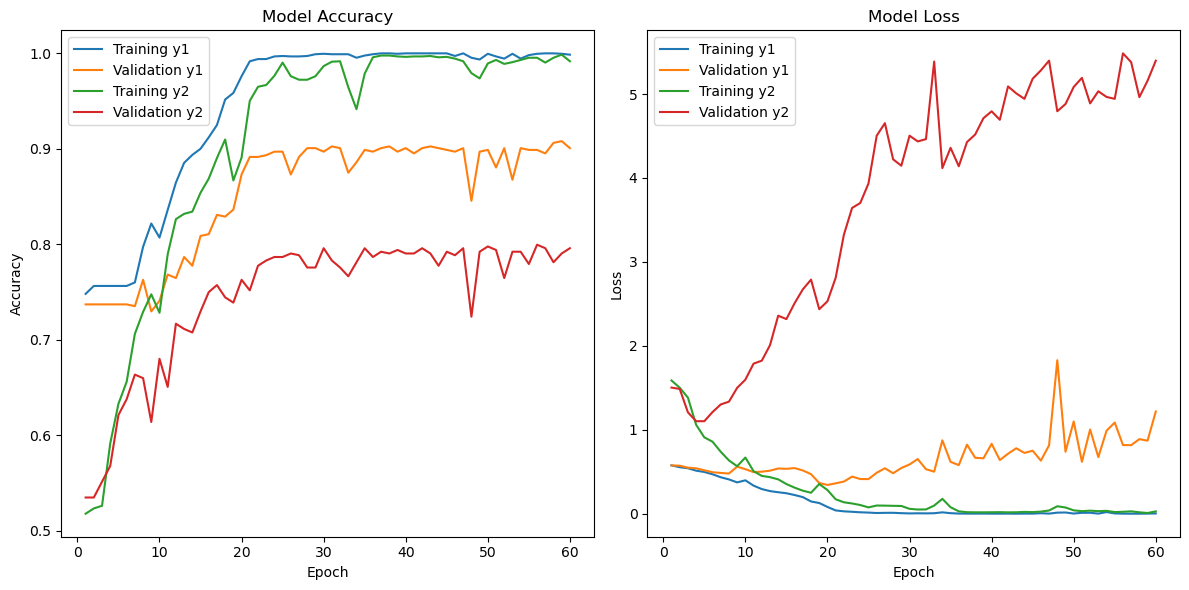

In [40]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy and loss values
train_loss_y1 = history.history['output_y1_loss']
val_loss_y1 = history.history['val_output_y1_loss']
train_acc_y1 = history.history['output_y1_accuracy']
val_acc_y1 = history.history['val_output_y1_accuracy']

train_loss_y2 = history.history['output_y2_loss']
val_loss_y2 = history.history['val_output_y2_loss']
train_acc_y2 = history.history['output_y2_accuracy']
val_acc_y2 = history.history['val_output_y2_accuracy']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_acc_y1) + 1), train_acc_y1, label='Training y1')
plt.plot(range(1, len(val_acc_y1) + 1), val_acc_y1, label='Validation y1')
plt.plot(range(1, len(train_acc_y2) + 1), train_acc_y2, label='Training y2')
plt.plot(range(1, len(val_acc_y2) + 1), val_acc_y2, label='Validation y2')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss_y1) + 1), train_loss_y1, label='Training y1')
plt.plot(range(1, len(val_loss_y1) + 1), val_loss_y1, label='Validation y1')
plt.plot(range(1, len(train_loss_y2) + 1), train_loss_y2, label='Training y2')
plt.plot(range(1, len(val_loss_y2) + 1), val_loss_y2, label='Validation y2')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
# evaluating
histo=model.evaluate(testing_padded,(Y1_test,Y2_test))

17/17 [==============================] - 0s 5ms/step - loss: 6.6162 - output_y1_loss: 1.2186 - output_y2_loss: 5.3976 - output_y1_accuracy: 0.9007 - output_y2_accuracy: 0.7960


In [61]:
# testing
sentence = ["ali koçtan şike kumpası davasında verilen cezalara ilişkin ilk açıklama "]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')
prediction=model.predict(padded)
print(prediction)

1/1 [==============================] - 0s 19ms/step
[array([[9.993278e-01, 6.722074e-04]], dtype=float32), array([[8.1577939e-01, 3.0601958e-26, 4.0118592e-03, 6.5791655e-01,
        6.8455803e-01, 9.9166220e-01, 3.0393185e-15]], dtype=float32)]


In [63]:
print(np.argmax(prediction[0]))

0


In [43]:
#model kaydetmek
model.save('tweetter3.h5')

C:\Users\USMAN KHALID\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
import pickle

# tokenizer kaydetmek
with open('tweeter_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
pred=model2.predict(testing_padded)

17/17 [==============================] - 0s 2ms/step


In [73]:
np.argmax(pred[0][50])

1